In [1]:
import os
if "models" not in os.listdir("."):
    os.chdir("../..")

In [2]:
import json

results = []

for i in range(4):
    with open(f"task_pair_metrics_fixed_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])

In [3]:
first_task = "antonyms"

task_results = [result for result in results if result["task_pair"][0] == first_task]

len(task_results)

44

In [4]:
from sprint.task_vector_utils import load_tasks, ICLRunner

# Load tasks
tasks = load_tasks()

fatal: destination path 'data/itv' already exists and is not an empty directory.


In [5]:
task_names = list(tasks.keys())

In [6]:
result_dict = {tuple(x["task_pair"]):x for x in results}

In [7]:
faithfulness_task = result_dict[(first_task, first_task)]["faithfullness"]
n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]



In [8]:
for second_task in task_names:
    try:
        orig_metric = result_dict[(second_task, second_task)]["orig_metric"]
        zero_metric = result_dict[(second_task, second_task)]["zero_metric"]

        print(
            f"{second_task}: orig_metric: {orig_metric}, zero_metric: {zero_metric}"
        )
    except KeyError:
        print(f"No results for {second_task}")

location_continent: orig_metric: 8.75, zero_metric: -7.28125
football_player_position: orig_metric: 2.21875, zero_metric: -11.4375
location_religion: orig_metric: 9.0625, zero_metric: -10.3125
location_language: orig_metric: 11.1875, zero_metric: -9.9375
person_profession: orig_metric: -1.6328125, zero_metric: -11.1875
location_country: orig_metric: 1.5546875, zero_metric: -11.375
country_capital: orig_metric: 11.625, zero_metric: -12.6875
person_language: orig_metric: 12.375, zero_metric: -7.75
singular_plural: orig_metric: 14.75, zero_metric: -12.6875
present_simple_past_simple: orig_metric: 17.5, zero_metric: -12.8125
antonyms: orig_metric: 9.625, zero_metric: -12.4375
plural_singular: orig_metric: 11.875, zero_metric: -11.25
present_simple_past_perfect: orig_metric: 17.5, zero_metric: -12.75
present_simple_gerund: orig_metric: 16.25, zero_metric: -12.375
en_it: orig_metric: 20.875, zero_metric: -18.875
it_en: orig_metric: 2.203125, zero_metric: -10.0
en_fr: orig_metric: 22.0, zero_

In [31]:
import plotly.express as px

first_task = "person_language"

faithfulness_task = result_dict[(first_task, first_task)]["faithfullness"]
n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]


fig = px.line(x=[max(n_nodes_task) - x for x in n_nodes_task], y=faithfulness_task)

for second_task in task_names:
    # if second_task == "person_profession":
    #     continue
    faithfulness_second = result_dict[(first_task, second_task)]["faithfullness"]
    n_nodes_second = result_dict[(first_task, second_task)]["n_nodes_counts"]
    fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second, name=second_task)

# fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second)

fig.update_xaxes(title="Number of nodes")
fig.update_yaxes(title="Faithfullness")

fig


In [35]:
import numpy as np 

# task_names = [x for x in task_names if x not in ["person_profession", "football_player_position"]]
heatmap_data = np.zeros((len(task_names), len(task_names)))


for i, first_task in enumerate(task_names):
    _faith = result_dict[(first_task, first_task)]["faithfullness"]
    print(
        first_task, max(_faith)
    )
    idx = [i for i, x in enumerate(_faith) if x > 0.4][0]
    for j, second_task in enumerate(task_names):
        if first_task == second_task:
            faith = _faith
        else:
            faith = result_dict[(first_task, second_task)]["faithfullness"]
        heatmap_data[i, j] = faith[idx]

heatmap_data = np.flip(heatmap_data, axis=0)

fig = px.imshow(heatmap_data - 1, x=task_names, y=task_names[::-1], color_continuous_scale="Reds_r", width=800,  height=600, 
                labels=dict(x="Tested task", y="Ablated task", color="Faithfullness change"), zmax=0)

fig.update_layout(width =400, height=300, 
                font_family="Serif", font_size=7, 
                margin_l=5, margin_t=5, margin_b=5, margin_r=5)

import plotly.io as pio

pio.kaleido.scope.mathjax = None
pio.write_image(fig, "micrlhf-progress/images/circuit-ablation-new.pdf", width =400, height=300)
pio.write_image(fig, "micrlhf-progress/images/circuit-ablation-new.pdf", width =400, height=300)

fig

location_continent 0.48355263157894735
football_player_position 0.4233409610983982
location_religion 0.5268145161290323
location_language 0.4249260355029586
person_profession 0.7751430907604252
location_country 0.7963746223564955
country_capital 0.6401028277634961
person_language 0.484472049689441
singular_plural 0.6492027334851936
present_simple_past_simple 0.6824742268041237
antonyms 1.0
plural_singular 0.6047297297297297
present_simple_past_perfect 0.5847107438016529
present_simple_gerund 0.7117903930131004
en_it 0.7169811320754716
it_en 0.8410691421254801
en_fr 0.45496601208459214
en_es 0.7960199004975125
fr_en 0.7311917443408789
es_en 0.8038617886178862
algo_last 0.7249230769230769
algo_first 0.724953421409214
algo_second 0.5544554455445545


location_continent 0.44556962025316454 0.46582278481012657
location_religion -0.02459016393442623 -0.01639344262295082
location_language 0.09248554913294797 0.10789980732177264
location_country -0.12941176470588237 -0.08235294117647059
country_capital 0.23695345557122707 0.24259520451339917
person_language 0.2 0.20588235294117646
singular_plural 0.034482758620689655 0.05517241379310345
present_simple_past_simple 0.3953488372093023 0.4119601328903654
antonyms 0.23427331887201736 0.24295010845986983
plural_singular 0.17921146953405018 0.2007168458781362
present_simple_past_perfect 0.4199134199134199 0.4329004329004329
present_simple_gerund 0.3205699020480855 0.3455031166518255
en_it -0.15833333333333333 -0.14166666666666666
it_en 0.26804123711340205 0.30927835051546393
en_fr -0.16037735849056603 -0.1509433962264151
en_es 0.18052256532066507 0.1995249406175772
fr_en 0.26506024096385544 0.3132530120481928
es_en 0.2608695652173913 0.3333333333333333
algo_last -0.018532818532818532 0.0123552

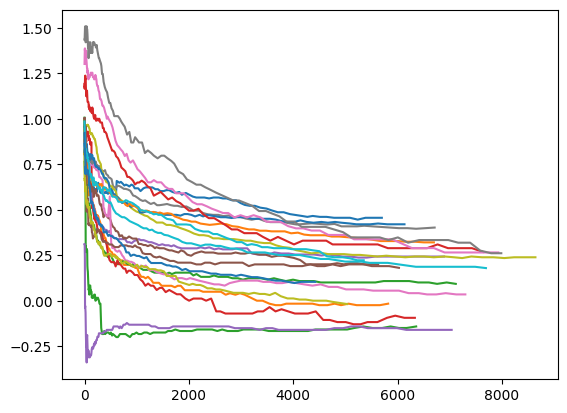

In [35]:
import matplotlib.pyplot as plt

plot_data = []

for i, first_task in enumerate(task_names):
    _faith = result_dict[(first_task, first_task)]["faithfullness"]
    n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]

    print(first_task, min(_faith[:10]), max(_faith[:10]))

    plt.plot([max(n_nodes_task) - x for x in n_nodes_task]  , _faith, label=first_task)

plt.show()

In [59]:
with open("task_faithfulness_metrics.jsonl") as f:
    lines = f.readlines()
    results = [json.loads(line) for line in lines]

inverse_results = [x for x in results if x["inverse"]]

# print(inverse_results[0])



# inverse_results = {x["task"]: x for x in inverse_results}
non_inverse_results = [x for x in results if not x["inverse"]]
# non_inverse_results = {x["task"]: x for x in non_inverse_results}

import matplotlib.pyplot as plt

plot_data = []

for i, first_task in enumerate(task_names):
    if first_task in ["algo_last", "country_capital", "en_fr"]:
        continue
    _faith = inverse_results[i]["faithfullness"]
    n_nodes_task = inverse_results[i]["n_nodes_counts"]

    plot_data.append((_faith, [max(n_nodes_task) - x for x in n_nodes_task]))

    print(first_task, min(_faith[:100]), max(_faith[:10]))

    # plt.plot(n_nodes_task  , _faith, label=first_task)


def interpolate(x, y, x_new):

    max_x = max(x)
    max_x_new = max(x_new)

    print(y[-10:])

    if max_x_new > max_x:
        x = x + [max_x_new]
        y = y + [y[0]]

    from scipy.interpolate import interp1d
    f = interp1d(x, y)
    return f(x_new)

#average across all tasks

n_nodes = []
for faith, n_nodes_task in plot_data:
    n_nodes.extend(n_nodes_task)

n_nodes = sorted(list(set(n_nodes)))

# faith = np.zeros(len(n_nodes))


new_faiths = []

for faith, n_nodes_task in plot_data:
    faith = interpolate(n_nodes_task, faith, n_nodes)
    
    new_faiths.append(faith)

faith = np.mean(new_faiths, axis=0)

n_nodes = np.array(n_nodes)

# fig = px.imshow(heatmap_data - 1, x=task_names, y=task_names[::-1], color_continuous_scale="RdBu", width=800,  height=600, 
#                 labels=dict(x="Tested task", y="Ablated task", color="Faithfullness"))

fig = px.line(x=n_nodes[n_nodes < 5000], y=faith[n_nodes < 5000], labels=dict(x="Number of nodes", y="Faithfullness"))

fig.update_layout(width =400, height=300, 
                font_family="Serif", font_size=12, 
                margin_l=5, margin_t=5, margin_b=5, margin_r=5)

import plotly.io as pio
pio.write_image(fig, "micrlhf-progress/images/faith-nodes-inverse.pdf", width =400, height=300)

fig

location_continent 0.3037974683544304 0.3240506329113924
location_religion 0.08 0.2
location_language -0.02459016393442623 0.00819672131147541
location_country 0.05394990366088632 0.06936416184971098
person_language -0.12941176470588237 0.011764705882352941
singular_plural 0.23695345557122707 0.27080394922425954
present_simple_past_simple 0.16470588235294117 0.17647058823529413
antonyms 0.034482758620689655 0.041379310344827586
plural_singular 0.3554817275747508 0.3588039867109635
present_simple_past_perfect 0.22125813449023862 0.22559652928416485
present_simple_gerund 0.13620071684587814 0.14336917562724014
en_it 0.38095238095238093 0.38961038961038963
it_en 0.28495102404274264 0.2920747996438112
en_es 0.20618556701030927 0.20618556701030927
fr_en -0.16981132075471697 -0.16037735849056603
es_en 0.171021377672209 0.19002375296912113
algo_first 0.14492753623188406 0.17391304347826086
algo_second -0.04942084942084942 -0.043243243243243246
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0